# Linear Regression vs. Logistic Regression

In the previous tutorial we attempted to predict a person's annual medical charges using _linear regression_. In this tutorial, we'll use _logistic regression_, which is better suited for _classification_ problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a _classfication_ or _regression_ problem is an important first step in machine learning.
### Classification Problems


Problems where each input must be assigned a discrete category (also called label or class) are known as _classification problems_.

Classification problems can be binary (yes/no) or multiclass (picking one of many classes).

But the output will be the probability of whether the thing that will happen or not.


# Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="480">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


## Multiclass Classification

By design,  logistic regression models are inherently suited for binary classification tasks, where the target vector (label column) comprises only two classes.

However, extensions to logistic regression exist within libraries such as scikit-learn, enabling its utilization for multiclass classification scenarios, where the target vector has more than two classes..

Common Approaches:

* One-vs-Rest (OvR) multiclass strategy
* Softmax Regression (Multinomial Logistic Regression)


## Multinomial Logistic Regression

Softmax regression (or Multinomial Logistic Regression) is a generalization of logistic regression to the case where we want to handle multiple classes.
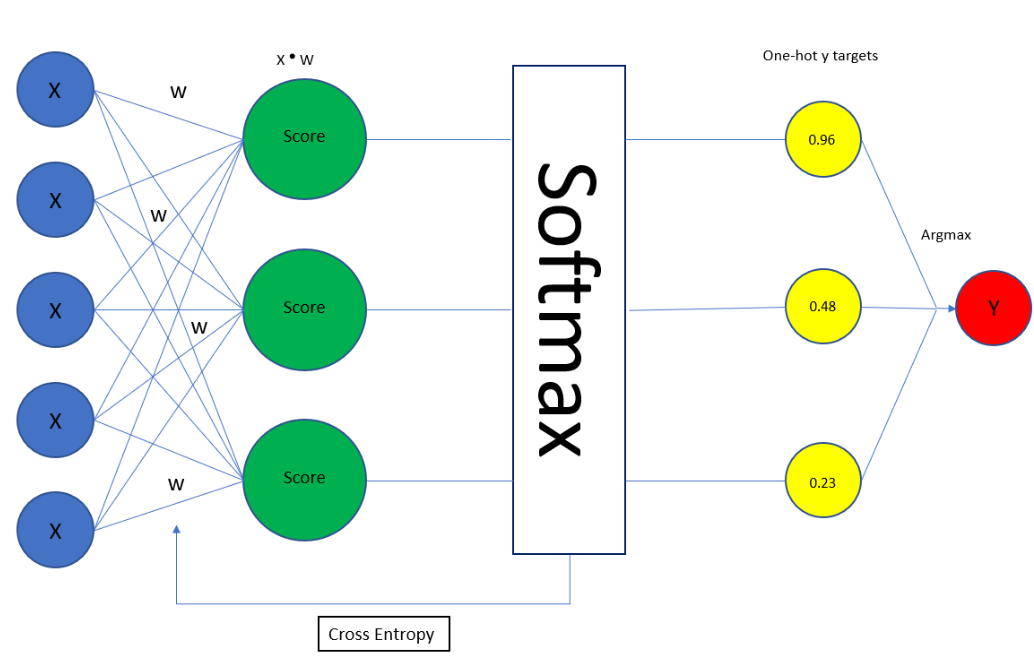


In [5]:
#Import all of our libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



In [6]:
#load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_new = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

df_new.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
31,1,1,female,NaN,1,0,146.5208


In [9]:
#check for missing values present or not!
df_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [11]:
#dropping off the missing rows
df_new = df_new.dropna()
df_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
df_new.shape

(714, 7)

In [14]:
#encode categorical data
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [16]:
df_new['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
#Split the data X and y
df_new.columns
X= df_new.drop('Survived', axis=1)
y = df_new['Survived']

In [20]:
#categorical data encoding
X = pd.get_dummies(X, drop_first = True)
X.sample() #converted our categorical data to boolien. 

,Pclass,Age,SibSp,Parch,Fare,Sex_male
393,1,23.0,1,0,113.275,False


In [21]:
#splitting data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [23]:
#train logistic regression model
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

#making prediction
y_pred = LR.predict(X_test)

## Confusion Matrix

It's a table that describes the performance of a classification model. It presents a summary of the correct and incorrect predictions broken down by each class.

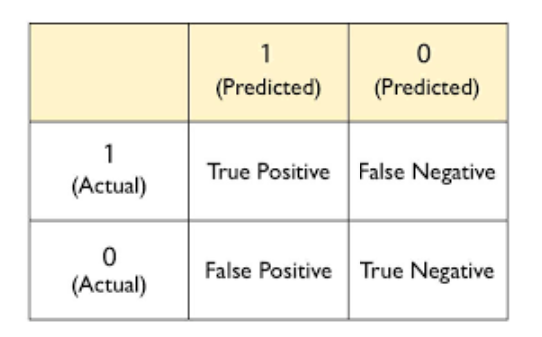

### Why Confusion Matrix?

Confusion matrix provides more insights than accuracy alone. It allows you to see where the model is making errors, such as confusing one class with another.



## How to calculate accuracy from confusion matrix?

You can calculate accuracy from a confusion matrix, you sum up the diagonal elements of the confusion matrix (which represent the correctly predicted instances for each class) and divide it by the total number of instances.

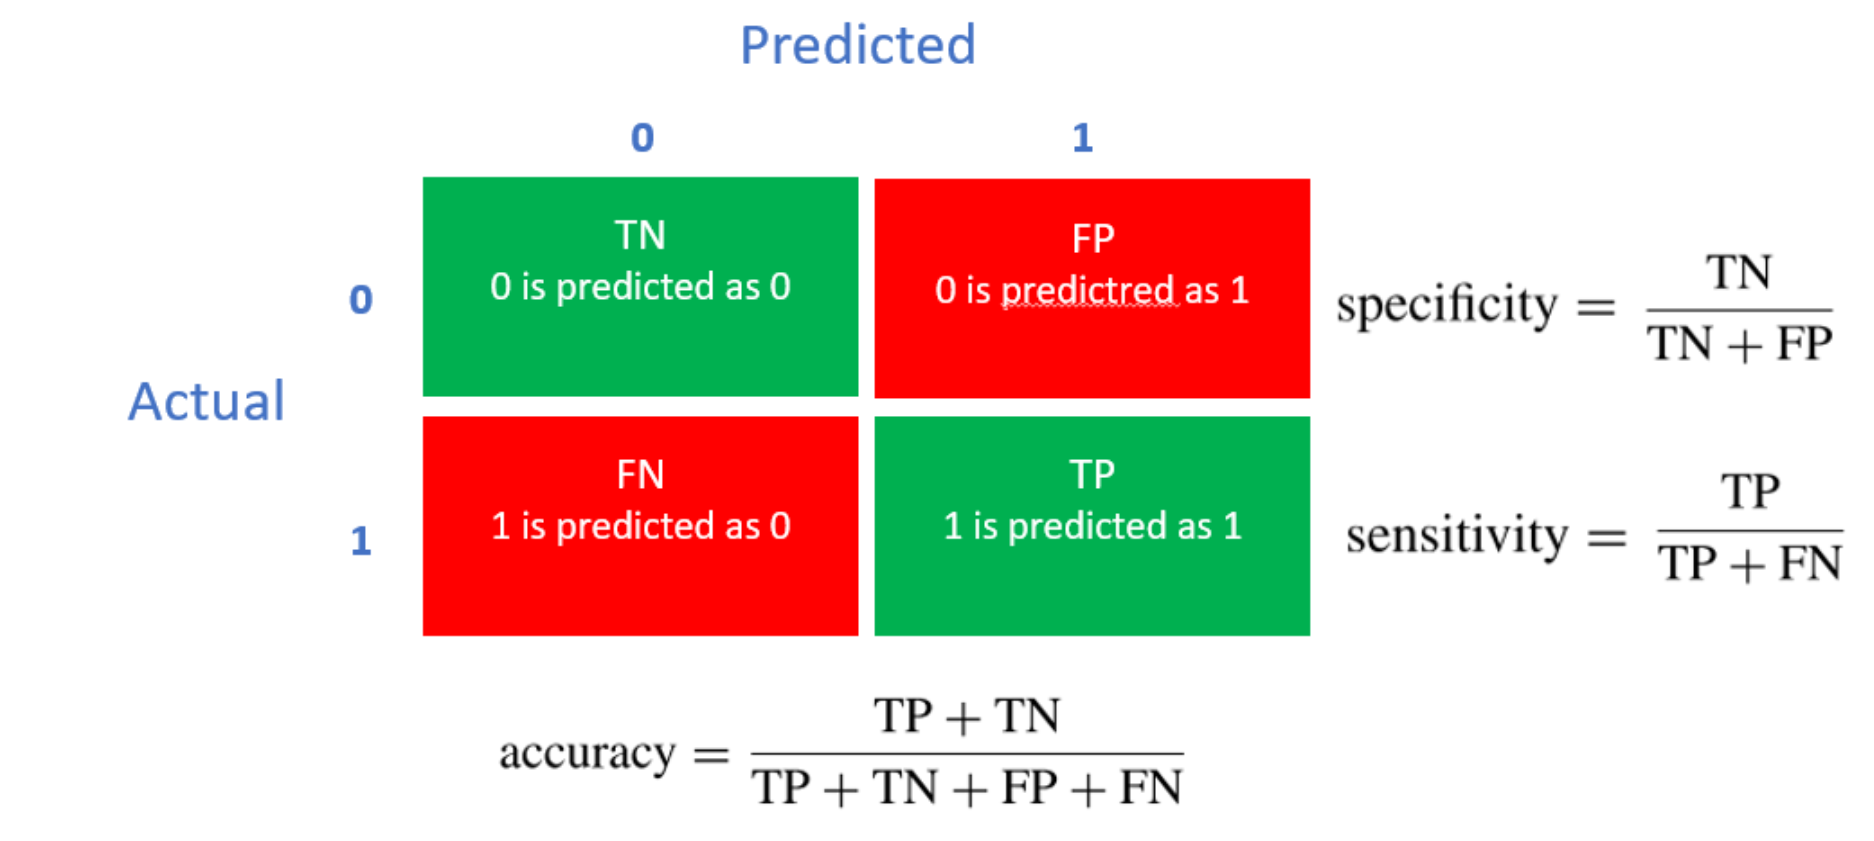

where:

* **True Positives**: It is the case where we predicted Yes and the real output was also yes.
* **True Negatives**: It is the case where we predicted No and the real output was also No.
* **False Positives**: It is the case where we predicted Yes but it was actually No.
* **False Negatives**: It is the case where we predicted No but it was actually Yes.

Note: But you cannot calculate Confusion Matrix from Accuracy, because accuracy is just a number.

## Precision

It measures the accuracy of the positive predictions made by the classifier. It's calculated as the number of true positives divided by the sum of true positives and false positives.

## Recall

It measures the ability of the classifier to find all the relevant cases within a dataset. It's calculated as the number of true positives divided by the sum of true positives and false negatives.
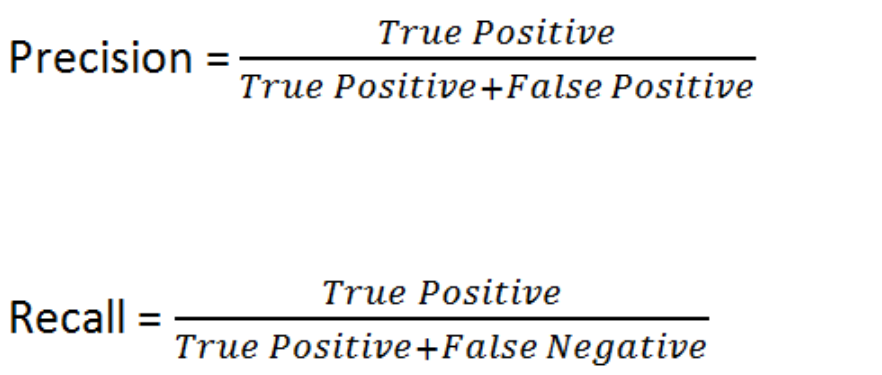
## Why F1 Score?

F1 score is the harmonic mean of precision and recall. It's useful when you want to find a balance between precision and recall, especially when classes are imbalanced.
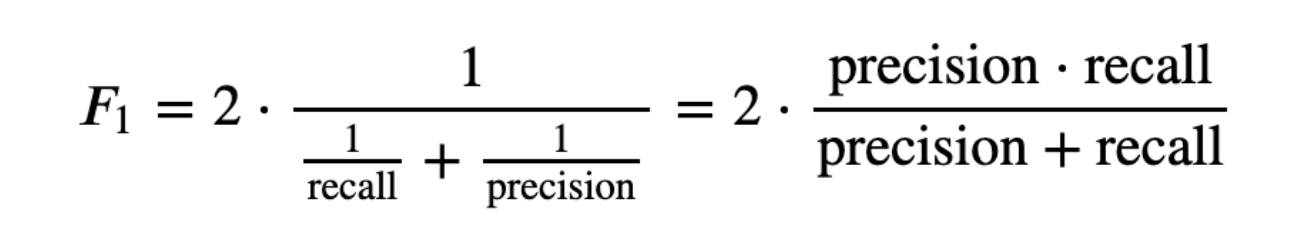

## Classification Report

It's a text summary of various classification metrics such as precision, recall, F1 score, and support (the number of actual occurrences of the class in the specified dataset). It provides a comprehensive evaluation of the model's performance across all classes.

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7482517482517482

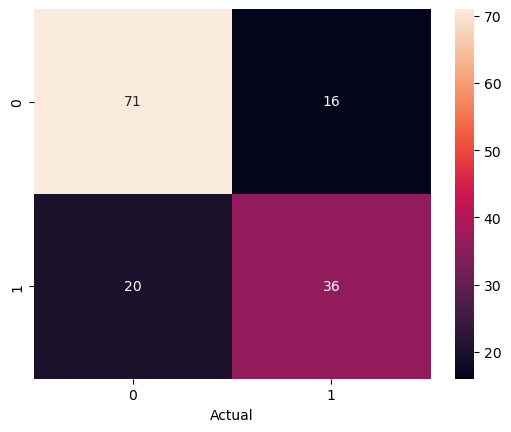

In [26]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



Case: A 35-year-old female in third class, 
with 1 sibling/spouse and 
0 parents/children aboard, paid a fare of 15. Did the person survived?

In [30]:
X_test.sample()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
363,3,35.0,0,0,7.05,True


In [34]:
new_prediction = LR.predict([[3,35,1,0,15,0]])
if new_prediction[0]==1:
    print('The passenger would survive')
else:
    print('The passenger would not survive')

The passenger would not survive


C:\Users\nikol\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Diamonds Dataset (Transform a continuous data to discreet form)

In [37]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the 'diamonds' dataset from seaborn
df_diamond = sns.load_dataset('diamonds')
df_diamond.head()
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


<Axes: >

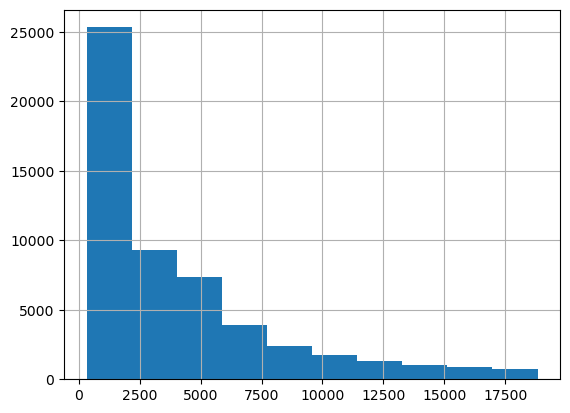

In [38]:
df_diamond['price'].hist()

### Categorize the price column into three categories:

- Low: price <= 2500
- Medium: 2500 < price <= 5000
- High: price > 5000

In [40]:
def categorize_price(price):
    if price<=2500:
        return 'Low'
    elif (price>2500 and price<5000):
        return 'Medium'
    else:
        return 'High'
df_diamond['Price_Category'] = df_diamond['price'].apply(categorize_price)

In [42]:
df_diamond.sample()
df_diamond['Price_Category'].value_counts()

Price_Category
Low       27542
High      14727
Medium    11671
Name: count, dtype: int64

In [44]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   carat           53940 non-null  float64 
 1   cut             53940 non-null  category
 2   color           53940 non-null  category
 3   clarity         53940 non-null  category
 4   depth           53940 non-null  float64 
 5   table           53940 non-null  float64 
 6   price           53940 non-null  int64   
 7   x               53940 non-null  float64 
 8   y               53940 non-null  float64 
 9   z               53940 non-null  float64 
 10  Price_Category  53940 non-null  object  
dtypes: category(3), float64(6), int64(1), object(1)
memory usage: 3.4+ MB


In [45]:
#splitting data
X=df_diamond[['carat', 'depth', 'table']]
y=df_diamond['Price_Category']

In [48]:
#y label encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

In [55]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 42)

In [57]:
LR1 = LogisticRegression()
LR1.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = LR1.predict(X_test)

In [60]:
cf=confusion_matrix(y_test, y_pred)
print(cf)

[[2310    3  564]
 [   4 5252  255]
 [ 408  306 1686]]


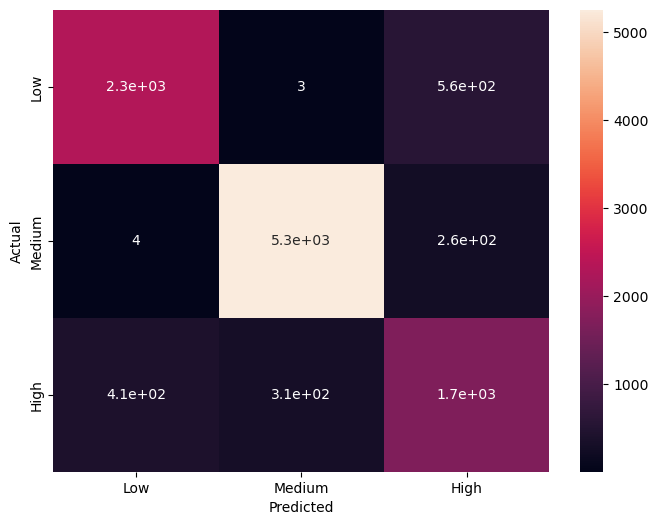

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(cf, annot=True, xticklabels=['Low','Medium','High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      2877
           1       0.94      0.95      0.95      5511
           2       0.67      0.70      0.69      2400

    accuracy                           0.86     10788
   macro avg       0.82      0.82      0.82     10788
weighted avg       0.86      0.86      0.86     10788



In [ ]:
# What is the dataset about?

In [ ]:
# Split the dataset



In [ ]:
# Train a logistic regression model for multiclass classification


# Make predictions

# Evaluate the model


In [ ]:
# Confusion matrix


# Plot confusion matrix
